# Analysis of PV prod data


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm, trange
import os
import xarray as xr
from matplotlib.colors import LogNorm

sns.set(style="darkgrid")

In [2]:
# Charger les données : X7 eHighway
path_PV = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\prod_PV\CAM4_F2000_p144_ctrl_PV_9scenarios_timeseries\CAM4_F2000_p144_ctrl_batch_0001.eHighway.X7.PV.nc"

data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)

C:\Users\flore\AppData\Local\Temp\ipykernel_14072\4259423864.py:4: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)


France 

(1000,)
Mean Demand: 15.745289888620377
Variance: 70.42310019993162
Min Demand: 1.146070122718811
Max Demand: 32.03756332397461


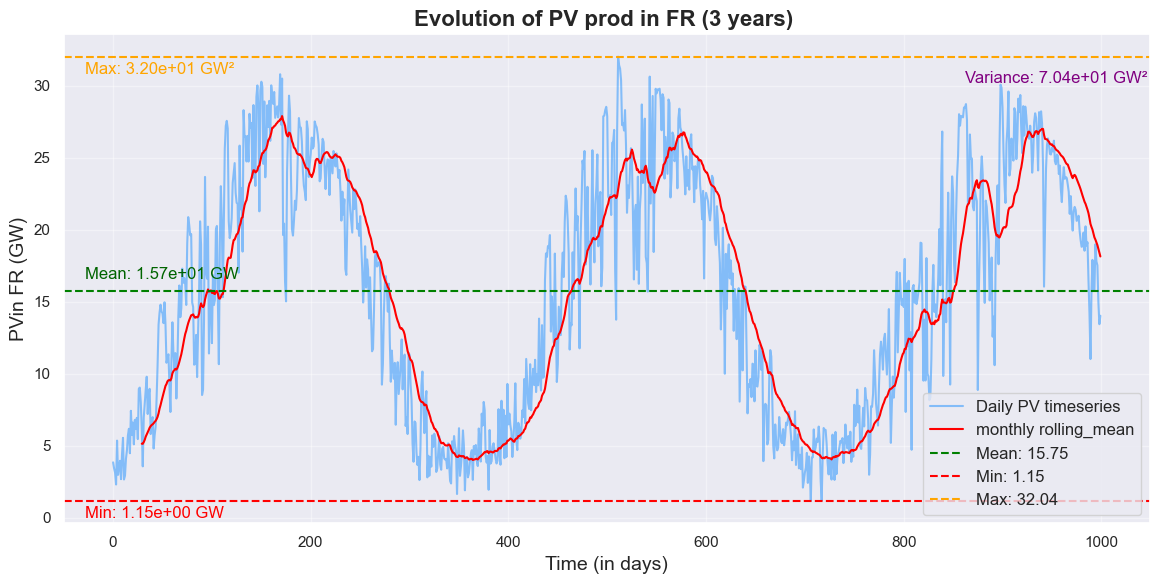

Moyenne de PV_FR : 1.57e+01 GW
Variance de PV_FR : 7.04e+01 GW²


In [4]:
# Evolution PV prod sur 3 ans 
# Extraire une tranche des données, environ 3 ans
data_to_plot = data_PV.PV_FR.isel(time=slice(0, 8000), lat=0, lon=0)  

# Convertir les valeurs en GW
data_to_plot_in_GW = data_to_plot / 1e9  

# daily mean 
data_to_plot_in_GW  = data_to_plot_in_GW.resample(time='D').mean()

# rolling mean
rolling_mean = data_to_plot_in_GW.rolling(time=30).mean()

# Convertir les données en tableau numpy pour le fit
data_values = data_to_plot_in_GW.values.flatten()
print(data_values.shape)

# Calcul de la moyenne, l'écart-type, variance, min max
mean_value = data_to_plot_in_GW.mean(dim='time').values
std_value = data_to_plot_in_GW.std(dim='time').values
variance_value = data_to_plot_in_GW.var(dim='time').values
min_PV = data_to_plot_in_GW.min().values
max_PV = data_to_plot_in_GW.max().values

# Affichage des statistiques
print(f"Mean Demand: {mean_value}")
print(f"Variance: {variance_value}")
print(f"Min Demand: {min_PV}")
print(f"Max Demand: {max_PV}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(range(len(data_values)), data_values, color='dodgerblue', label='Daily PV timeseries', alpha=0.5)


# Tracer la courbe gaussienne ajustée
plt.plot(rolling_mean, color='red', label=f'monthly rolling_mean')
# Ajouter des lignes horizontales pour les statistiques (moyenne, min, max)
plt.axhline(mean_value, color='green', linestyle='--', label=f"Mean: {mean_value:.2f}")
plt.axhline(min_PV, color='red', linestyle='--', label=f"Min: {min_PV:.2f}")
plt.axhline(max_PV, color='orange', linestyle='--', label=f"Max: {max_PV:.2f}")

# Ajouter les valeurs de moyenne et variance sur le graphique
plt.text(0.02, 0.50, f"Mean: {mean_value:.2e} GW", transform=plt.gca().transAxes, fontsize=12, color='darkgreen')
plt.text(0.83, 0.90, f"Variance: {variance_value:.2e} GW²", transform=plt.gca().transAxes, fontsize=12, color='purple')
plt.text(0.02, 0.01, f"Min: {min_PV:.2e} GW", transform=plt.gca().transAxes, fontsize=12, color='red')
plt.text(0.02, 0.92, f"Max: {max_PV:.2e} GW²", transform=plt.gca().transAxes, fontsize=12, color='orange')


# Ajouter un titre, des étiquettes d'axes et une légende
plt.title("Evolution of PV prod in FR (3 years) ", fontsize=16, fontweight='bold')
plt.xlabel("Time (in days)", fontsize=14)
plt.ylabel("PVin FR (GW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()




# Affichage des valeurs de moyenne et variance dans la console
print(f"Moyenne de PV_FR : {mean_value:.2e} GW")
print(f"Variance de PV_FR : {variance_value:.2e} GW²")

C:\Users\flore\AppData\Local\Temp\ipykernel_39036\3022351826.py:8: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)


(365,)


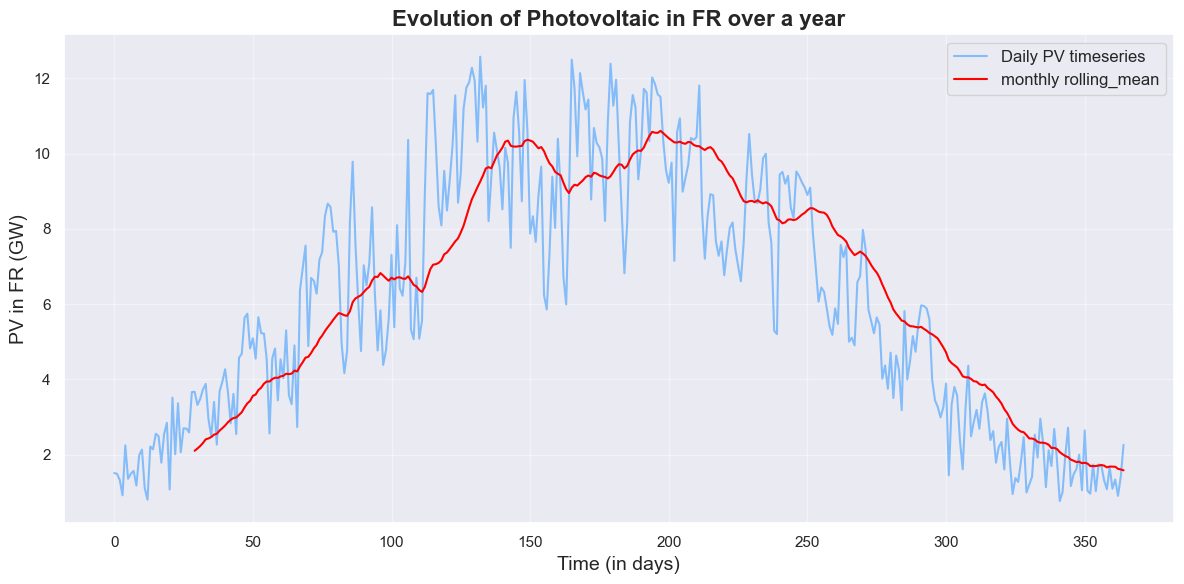

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Charger les données
path_PV = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\prod_PV\CAM4_F2000_p144_ctrl_PV_9scenarios_timeseries\CAM4_F2000_p144_ctrl_batch_0002.EC.REF2016.PV.nc"  # Remplacez par le chemin correct
data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)

# Extraire une tranche des données
data_to_plot = data_PV.PV_FR.isel(time=slice(0, 2920), lat=0, lon=0)  # Ajustez la tranche de temps

# Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
data_to_plot_in_GW = data_to_plot / 1e9  # Conversion de W*10^10 en GW

# daily mean 
data_to_plot_in_GW  = data_to_plot_in_GW.resample(time='D').mean()
# rolling mean
rolling_mean = data_to_plot_in_GW.rolling(time=30).mean()
# Convertir les données en tableau numpy pour le fit
data_values = data_to_plot_in_GW.values.flatten()
print(data_values.shape)


# Créer un nuage de points avec les données brutes
plt.figure(figsize=(12, 6))
plt.plot(range(len(data_values)), data_values, color='dodgerblue', label='Daily PV timeseries', alpha=0.5)


# Tracer la courbe  ajustée
plt.plot(rolling_mean, color='red', label=f'monthly rolling_mean')
# Ajouter un titre, des étiquettes d'axes et une légende
plt.title("Evolution of Photovoltaic in FR over a year", fontsize=16, fontweight='bold')
plt.xlabel("Time (in days)", fontsize=14)
plt.ylabel("PV in FR (GW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()



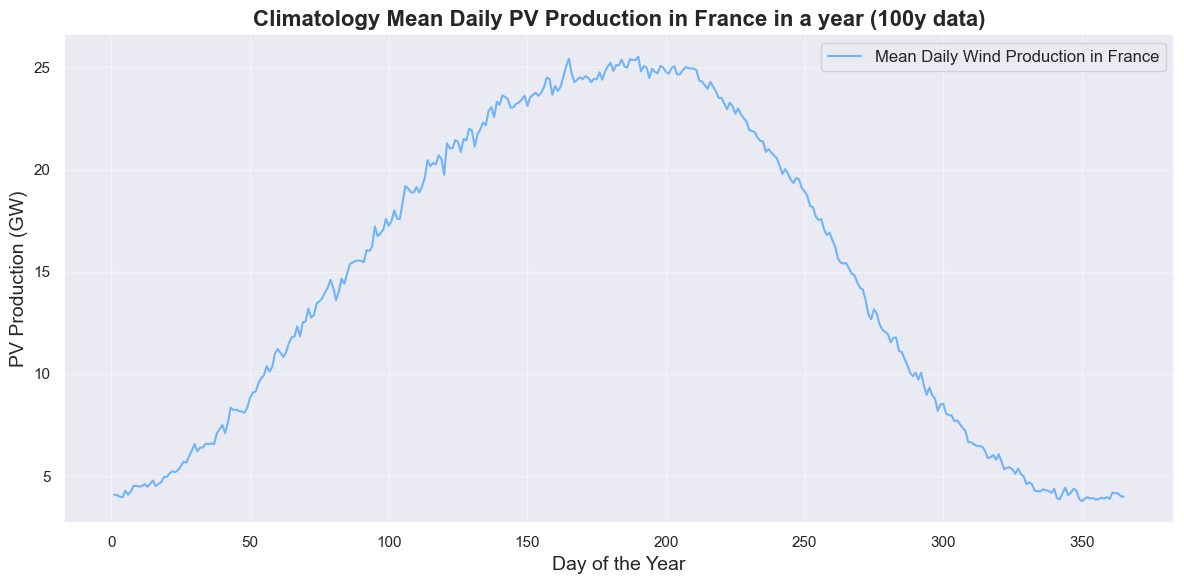

In [5]:
# Climatologie 

# Extraire une tranche des données (par exemple pour la France)
data_to_plot = data_PV['PV_FR'].isel(time=slice(0, 290000), lat=0, lon=0)  # Ajuste ici si nécessaire

# Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
data_to_plot_in_GW = data_to_plot / 1e9  # Conversion de W*10^10 en GW

# Resampling à une fréquence journalière
data_daily = data_to_plot_in_GW.resample(time='D').mean()

# Extraire le jour de l'année et l'année
data_daily['day_of_year'] = data_daily['time'].dt.dayofyear
data_daily['year'] = data_daily['time'].dt.year

# Calculer la moyenne pour chaque jour de l'année, en regroupant par 'day_of_year' et en prenant la moyenne sur 'time'
daily_mean_per_day = data_daily.groupby('day_of_year').mean('time')



# Visualisation avec un nuage de points (scatter plot)
plt.figure(figsize=(12, 6))

# Tracer la courbe
plt.plot(daily_mean_per_day['day_of_year'], daily_mean_per_day, color='dodgerblue', label='Mean Daily Wind Production in France', alpha=0.6)


# Ajouter un titre et des labels
plt.title("Climatology Mean Daily PV Production in France in a year (100y data)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("PV Production (GW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()

Selected countries

C:\Users\flore\AppData\Local\Temp\ipykernel_39036\1429428038.py:6: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)


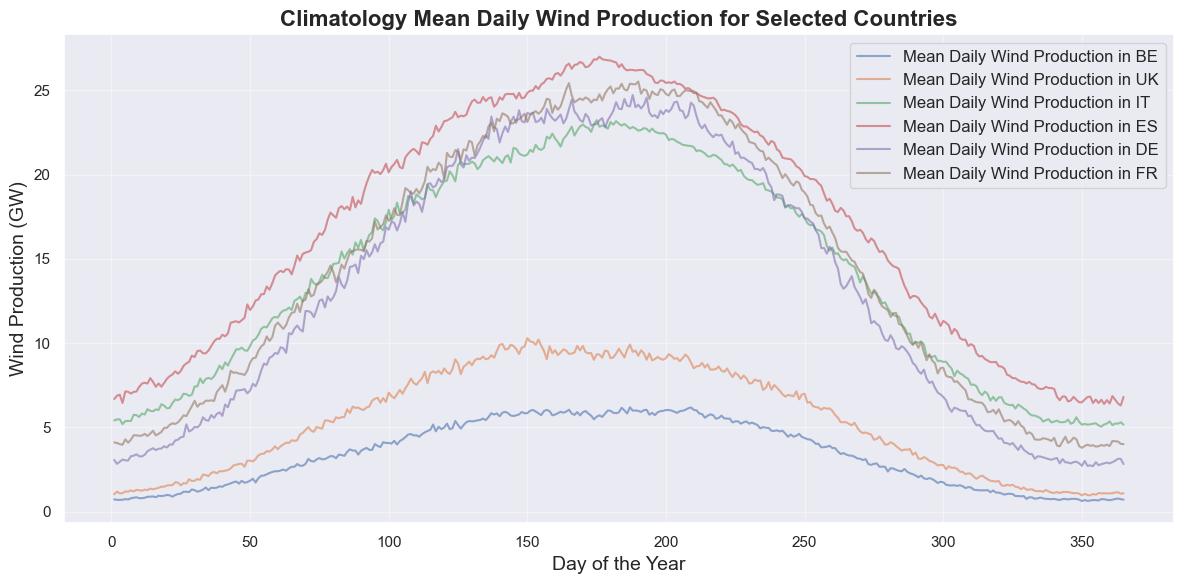

In [64]:
# Climatologie for selected countries 

# Liste des pays à traiter
countries = ['BE', 'UK', 'IT', 'ES', 'DE', 'FR']

# Initialiser une figure pour afficher les résultats
plt.figure(figsize=(12, 6))

# Itérer sur la liste des pays
for country in countries:
    # Vérifier si la variable pour ce pays existe dans data_wind
    country_var = f'PV_{country}'  # Exemple: 'Wind_FR', 'Wind_UK', etc.
    
    if country_var in data_PV.variables:
        # Extraire les données pour chaque pays
        data_to_plot = data_PV[country_var].isel(time=slice(0, 290000), lat=0, lon=0)  # Ajuste si nécessaire
        
        # Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
        data_to_plot_in_GW = data_to_plot / 1e9  # Conversion en GW
        
        # Resampling à une fréquence journalière
        data_daily = data_to_plot_in_GW.resample(time='D').mean()
        
        # Extraire le jour de l'année et l'année
        data_daily['day_of_year'] = data_daily['time'].dt.dayofyear
        data_daily['year'] = data_daily['time'].dt.year
        
        # Calculer la moyenne pour chaque jour de l'année
        daily_mean_per_day = data_daily.groupby('day_of_year').mean('time')
        
        # Tracer la courbe pour chaque pays
        plt.plot(daily_mean_per_day['day_of_year'], daily_mean_per_day, label=f'Mean Daily Wind Production in {country}', alpha=0.6)

# Ajouter un titre, des labels et une légende
plt.title("Climatology Mean Daily Wind Production for Selected Countries", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("Wind Production (GW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\flore\AppData\Local\Temp\ipykernel_14072\989180419.py:18: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_14072\989180419.py:18: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_14072\989180419.py:18: DeprecationWarning: Usage of 'use_cftime' as a kw

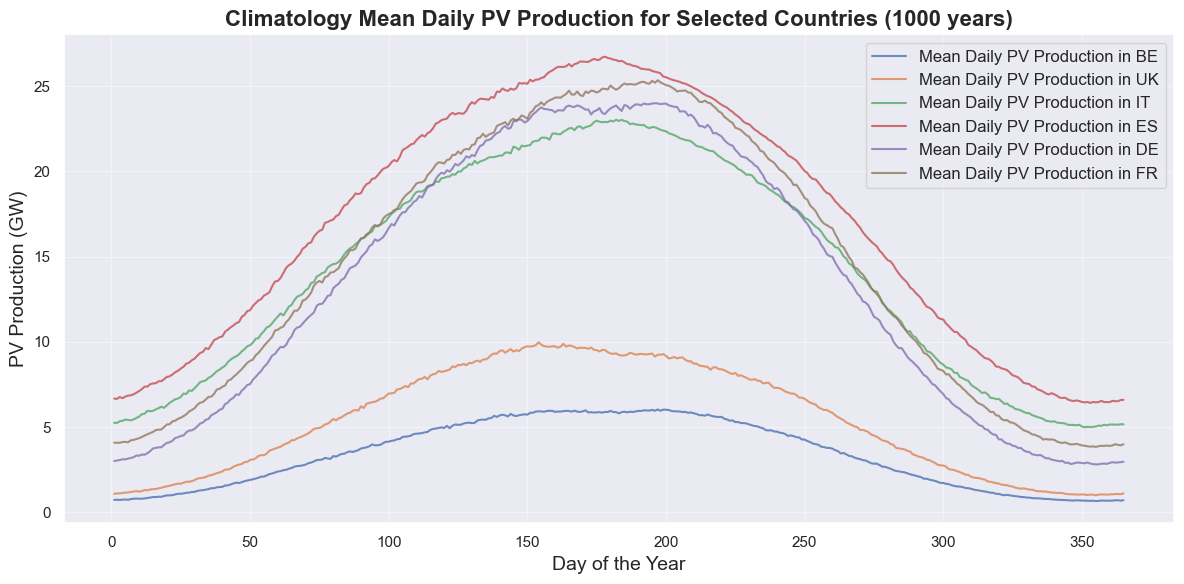

In [9]:


# Liste des pays à traiter
countries = ['BE', 'UK', 'IT', 'ES', 'DE', 'FR']

# Créer une figure pour afficher les résultats
plt.figure(figsize=(12, 6))

# Itérer sur chaque pays
for country in countries:
    all_daily_means = []

    # Itérer à travers les différents batchs
    for batch_id in range(1, 11):  # Pour batch_0001 à batch_0010
        # Générer le chemin du fichier pour chaque batch
        batch_str = f"batch_{batch_id:04d}"  # Format batch_0001, batch_0002, ..., batch_0010
        path_PV = f"C:\\Users\\flore\\OneDrive\\Documents\\annee3bx\\theselol\\analyse\\data\\prod_PV\\CAM4_F2000_p144_ctrl_PV_9scenarios_timeseries\\CAM4_F2000_p144_ctrl_{batch_str}.eHighway.X7.PV.nc"

        # Charger les données pour le batch actuel
        data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)

        # Construire le nom de la variable pour chaque pays (ex: 'Wind_FR', 'Wind_UK', etc.)
        country_var = f'PV_{country}'
        
        if country_var in data_PV.variables:
            # Extraire les données pour chaque pays
            data_to_plot = data_PV[country_var].isel(time=slice(0, 290000), lat=0, lon=0)  # Ajuste si nécessaire
            
            # Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
            data_to_plot_in_GW = data_to_plot / 1e9  # Conversion en GW
            
            # Resampling à une fréquence journalière
            data_daily = data_to_plot_in_GW.resample(time='D').mean()
            
            # Extraire le jour de l'année
            data_daily['day_of_year'] = data_daily['time'].dt.dayofyear

            # Calculer la moyenne pour chaque jour de l'année sur la période du batch
            daily_mean_per_day = data_daily.groupby('day_of_year').mean('time')
            
            # Ajouter cette moyenne à la liste de tous les batchs pour le pays
            all_daily_means.append(daily_mean_per_day)

    # Combiner les résultats de tous les batchs pour obtenir la moyenne sur 1000 ans
    combined_mean_per_day = xr.concat(all_daily_means, dim='batch')

    # Calculer la moyenne sur l'axe des batchs
    final_mean_per_day = combined_mean_per_day.mean(dim='batch')

    #Normaliser la production du pays 
    daily_mean_per_day = daily_mean_per_day / daily_mean_per_day.mean()
        

    # Tracer la courbe pour chaque pays
    plt.plot(final_mean_per_day['day_of_year'], final_mean_per_day, label=f'Mean Daily PV Production in {country}', alpha=0.8)

# Ajouter un titre, des labels et une légende
plt.title("Climatology Mean Daily PV Production for Selected Countries (1000 years)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("PV Production (GW)", fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()





C:\Users\flore\AppData\Local\Temp\ipykernel_39036\911859135.py:6: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)


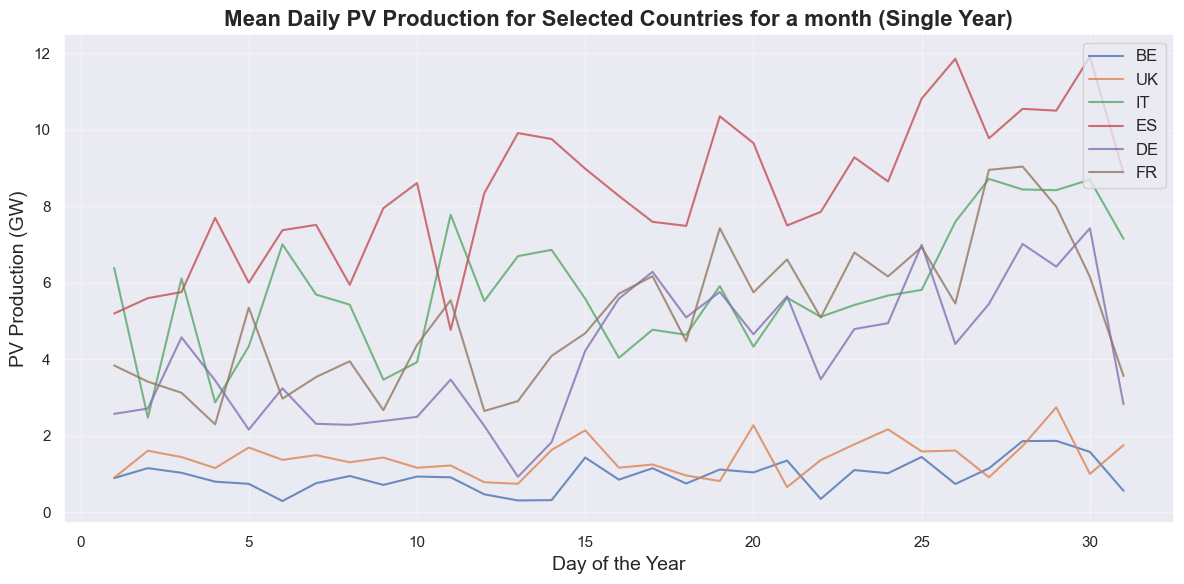

In [70]:
import matplotlib.pyplot as plt
import xarray as xr

# Charger le fichier pour batch_0001
path_PV = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\prod_PV\CAM4_F2000_p144_ctrl_PV_9scenarios_timeseries\CAM4_F2000_p144_ctrl_batch_0001.eHighway.X7.PV.nc"
data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)

# Liste des pays à analyser
countries = ['BE', 'UK', 'IT', 'ES', 'DE', 'FR']

# Créer une figure pour afficher les résultats
plt.figure(figsize=(12, 6))

# Itérer sur chaque pays
for country in countries:
    # Construire le nom de la variable pour chaque pays (ex: 'Wind_FR', 'Wind_UK', etc.)
    country_var = f'PV_{country}'
    
    if country_var in data_PV.variables:
        # Extraire les données pour le pays avec la tranche de temps spécifiée
        data_to_plot = data_PV[country_var].isel(time = slice (0,248), lat=0, lon=0)  # Ajuste ici si nécessaire
        
        # Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
        data_to_plot_in_GW = data_to_plot / 1e9  # Conversion en GW

        # Resampling à une fréquence journalière
        data_daily = data_to_plot_in_GW.resample(time='D').mean()
        
        # Extraire le jour de l'année
        data_daily['day_of_year'] = data_daily['time'].dt.dayofyear
        
        # Calculer la moyenne pour chaque jour de l'année
        daily_mean_per_day = data_daily.groupby('day_of_year').mean('time')
        
        # Tracer la courbe pour le pays
        plt.plot(daily_mean_per_day['day_of_year'], daily_mean_per_day, label=f'{country}', alpha=0.8)

# Ajouter un titre, des labels et une légende
plt.title("Mean Daily PV Production for Selected Countries for a month (Single Year)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("PV Production (GW)", fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()

C:\Users\flore\AppData\Local\Temp\ipykernel_14072\2110327877.py:1: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)


<xarray.Dataset> Size: 46MB
Dimensions:    (lon: 1, lat: 1, time: 292000, bnds: 2)
Coordinates:
  * lon        (lon) float64 8B 0.0
  * lat        (lat) float64 8B 0.0
  * time       (time) object 2MB 0001-01-01 00:00:00 ... 0100-12-31 21:00:00
Dimensions without coordinates: bnds
Data variables: (12/34)
    time_bnds  (time, bnds) object 5MB ...
    PV_AL      (time, lat, lon) float32 1MB ...
    PV_AT      (time, lat, lon) float32 1MB ...
    PV_BA      (time, lat, lon) float32 1MB ...
    PV_BE      (time, lat, lon) float32 1MB ...
    PV_BG      (time, lat, lon) float32 1MB ...
    ...         ...
    PV_RO      (time, lat, lon) float32 1MB ...
    PV_RS      (time, lat, lon) float32 1MB ...
    PV_SE      (time, lat, lon) float32 1MB ...
    PV_SI      (time, lat, lon) float32 1MB ...
    PV_SK      (time, lat, lon) float32 1MB ...
    PV_UK      (time, lat, lon) float32 1MB ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conven

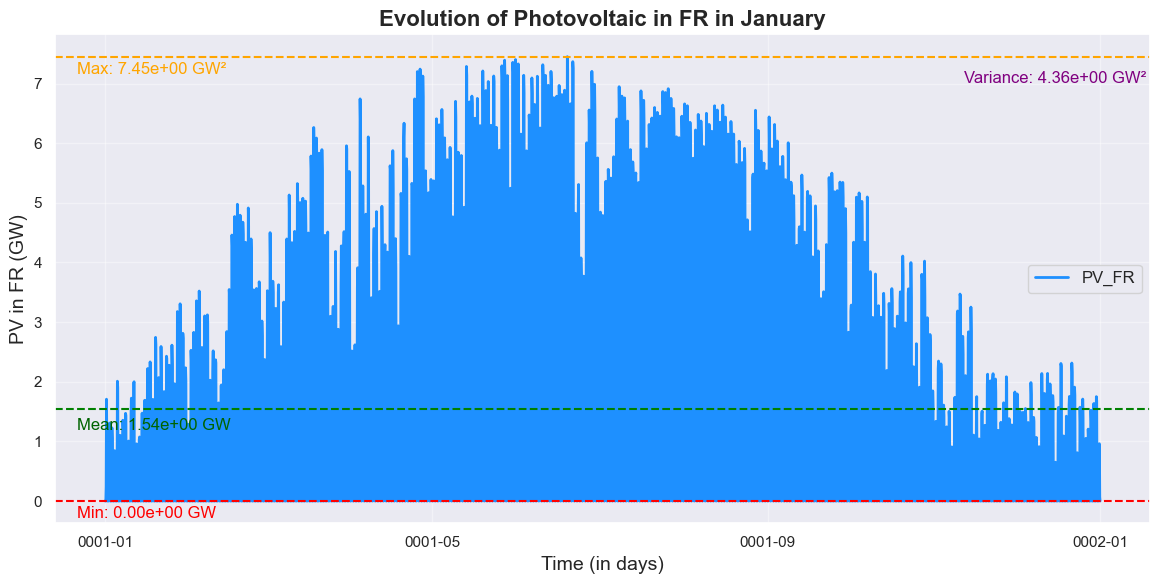

Moyenne de PV_FR : 1.54e+00 GW
Variance de PV_FR : 4.36e+00 GW²


In [6]:
# pas interresant mais garder pour contenu
data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
print(data_PV)

# Extraire une tranche des données
data_to_plot = data_PV.PV_FR.isel(time=slice(0, 2920), lat=0, lon=0) #pas de temps 3h donc 8 données/jours 


# Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
data_to_plot_in_GW = data_to_plot / 1e10  # Conversion de W*10^10 en GW

# Calcul de la moyenne et de l'écart-type
mean_value = data_to_plot_in_GW.mean(dim='time').values
std_value = data_to_plot_in_GW.std(dim='time').values

# Calcul de la variance
variance_value = data_to_plot_in_GW.var(dim='time').values
min_PV = data_to_plot_in_GW.min().values
max_PV = data_to_plot_in_GW.max().values

# Affichage des statistiques
print(f"Mean Demand: {mean_value}")
print(f"Variance: {variance_value}")
print(f"Min Demand: {min_PV}")
print(f"Max Demand: {max_PV}")

# Créer le graphique avec des personnalisations
plt.figure(figsize=(12, 6))  # Taille du graphique
data_to_plot_in_GW.plot(color='dodgerblue', linewidth=2, label='PV_FR')  # Ajouter une couleur et une épaisseur

# Ajouter un titre, des étiquettes d'axes et une légende
plt.title("Evolution of Photovoltaic in FR in January", fontsize=16, fontweight='bold')
plt.xlabel("Time (in days)", fontsize=14)
plt.ylabel("PV in FR (GW)", fontsize=14)  # Unité modifiée en GW
plt.legend(fontsize=12)  # Légende pour identifier la courbe
plt.grid(alpha=0.4)  # Ajouter une grille légère pour la lisibilité

# Ajouter des lignes horizontales pour les statistiques (moyenne, min, max)
plt.axhline(mean_value, color='green', linestyle='--', label=f"Mean: {mean_value:.2f}")
plt.axhline(min_PV, color='red', linestyle='--', label=f"Min: {min_PV:.2f}")
plt.axhline(max_PV, color='orange', linestyle='--', label=f"Max: {max_PV:.2f}")

# Ajouter les valeurs de moyenne et variance sur le graphique
plt.text(0.02, 0.19, f"Mean: {mean_value:.2e} GW", transform=plt.gca().transAxes, fontsize=12, color='darkgreen')
plt.text(0.83, 0.90, f"Variance: {variance_value:.2e} GW²", transform=plt.gca().transAxes, fontsize=12, color='purple')
plt.text(0.02, 0.01, f"Min: {min_PV:.2e} GW", transform=plt.gca().transAxes, fontsize=12, color='red')
plt.text(0.02, 0.92, f"Max: {max_PV:.2e} GW²", transform=plt.gca().transAxes, fontsize=12, color='orange')

# Ajuster la mise en page et afficher
plt.tight_layout()
plt.show()

# Affichage des valeurs de moyenne et variance dans la console
print(f"Moyenne de PV_FR : {mean_value:.2e} GW")
print(f"Variance de PV_FR : {variance_value:.2e} GW²")

Sum over 14 EU country 

C:\Users\flore\AppData\Local\Temp\ipykernel_71324\4210776768.py:22: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_71324\4210776768.py:22: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_71324\4210776768.py:22: DeprecationWarning: Usage of 'use_cftime' as a

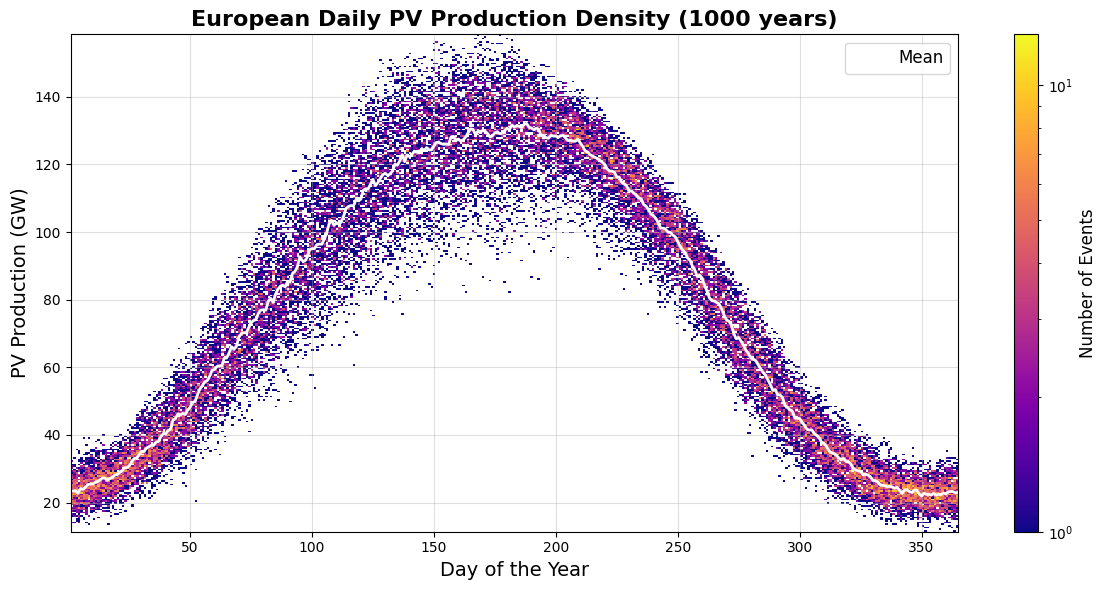

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from matplotlib.colors import LogNorm

# Liste des pays européens
countries = [
    "AT", "BE", "DK", "FR", "DE", "IE", "IT",
    "NL", "NO", "PT", "ES", "SE", "CH", "UK"
]

# Liste pour collecter toutes les sommes journalières
all_daily_sums = []

# Itérer sur les 10 batchs
for batch_id in range(1, 11):
    # Générer le chemin du fichier pour chaque batch
    batch_str = f"batch_{batch_id:04d}"  # Format batch_0001, batch_0002, ..., batch_0010
    path_PV = f"C:\\Users\\flore\\OneDrive\\Documents\\annee3bx\\theselol\\analyse\\data\\prod_PV\\CAM4_F2000_p144_ctrl_PV_9scenarios_timeseries\\CAM4_F2000_p144_ctrl_{batch_str}.eHighway.X7.PV.nc"
    
    # Charger les données pour le batch actuel
    data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
    
    # Liste pour stocker les données journalières des pays
    daily_sums_per_batch = []
    
    # Itérer sur les pays pour calculer la somme journalière
    for country in countries:
        country_var = f'PV_{country}'
        if country_var in data_PV.variables:
            # Extraire la production pour le pays et convertir en GW
            data_to_plot = data_PV[country_var].isel(lat=0, lon=0) / 1e9  # Conversion en GW
            
            # Resampler à une fréquence journalière
            data_daily = data_to_plot.resample(time='D').mean()
            
            # Ajouter aux données journalières
            daily_sums_per_batch.append(data_daily)
    
    # Calculer la somme journalière pour tous les pays dans ce batch
    total_daily_sum = sum(daily_sums_per_batch)

    
    # Extraire les jours de l'année
    total_daily_sum['day_of_year'] = total_daily_sum['time'].dt.dayofyear
    
    # Ajouter à la liste globale
    all_daily_sums.append(total_daily_sum)

# Combiner les données de tous les batchs
combined_data = xr.concat(all_daily_sums, dim='batch')


# Extraire toutes les valeurs de production et les jours de l'année
day_of_year = combined_data['day_of_year'].values.flatten()
PV_values = combined_data.values.flatten()

# Assurez-vous que les longueurs de day_of_year et wind_values sont les mêmes
min_length = min(len(day_of_year), len(PV_values))
day_of_year = day_of_year[:min_length]
PV_values = PV_values[:min_length]

# Créer le graphique
plt.figure(figsize=(12, 6))

# Histogramme bidimensionnel (densité des points)
plt.hist2d(day_of_year, PV_values, bins=[365, 300], cmap='plasma', norm=LogNorm())

# Ajouter une échelle de couleur
cbar = plt.colorbar()
cbar.set_label('Number of Events', fontsize=12)

# Calculer et tracer la moyenne pour chaque jour de l'année
mean_per_day = [np.nanmean(PV_values[day_of_year == day]) for day in range(1, 366)]
plt.plot(range(1, 366), mean_per_day, color='white', linewidth=2, label='Mean')

# Ajouter les détails du graphique
plt.title("European Daily PV Production Density (1000 years)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("PV Production (GW)", fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()

C:\Users\flore\AppData\Local\Temp\ipykernel_14324\1372253800.py:20: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_14324\1372253800.py:20: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_14324\1372253800.py:20: DeprecationWarning: Usage of 'use_cftime' as a

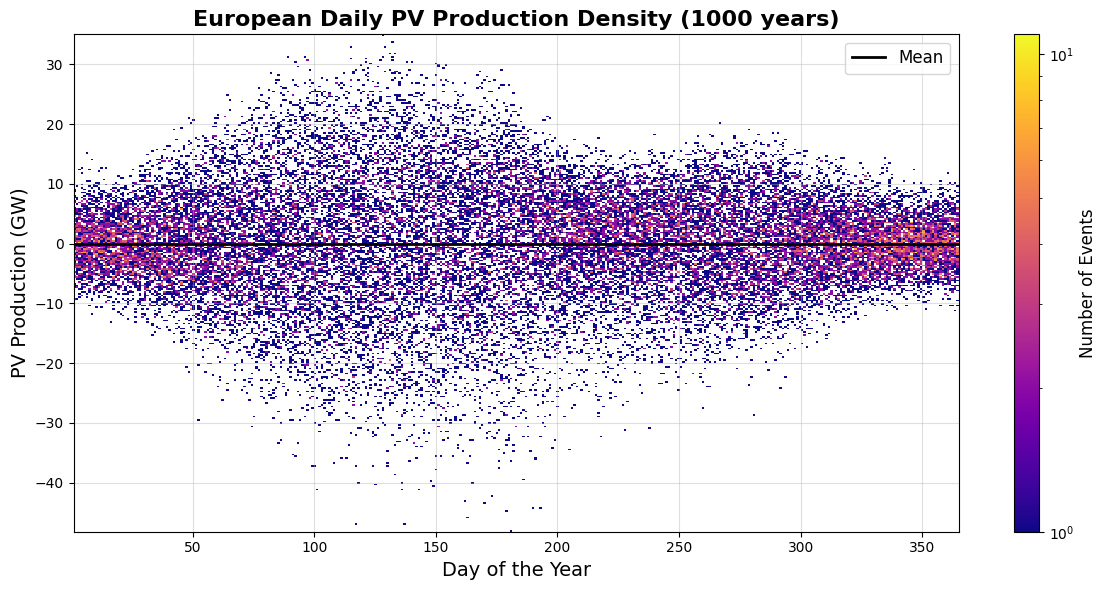

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from matplotlib.colors import LogNorm
# Liste des pays européens
countries = [
    "AT", "BE", "DK", "FR", "DE", "IE", "IT",
    "NL", "NO", "PT", "ES", "SE", "CH", "UK"]

# Liste pour collecter toutes les sommes journalières
all_daily_sums = []

# Itérer sur les 10 batchs
for batch_id in range(1, 11):
    # Générer le chemin du fichier pour chaque batch
    batch_str = f"batch_{batch_id:04d}"  # Format batch_0001, batch_0002, ..., batch_0010
    path_PV = f"C:\\Users\\flore\\OneDrive\\Documents\\annee3bx\\theselol\\analyse\\data\\prod_PV\\CAM4_F2000_p144_ctrl_PV_9scenarios_timeseries\\CAM4_F2000_p144_ctrl_{batch_str}.eHighway.X7.PV.nc"
    
    # Charger les données pour le batch actuel
    data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
    
    # Liste pour stocker les données journalières des pays
    daily_sums_per_batch = []
    
    # Itérer sur les pays pour calculer la somme journalière
    for country in countries:
        country_var = f'PV_{country}'
        if country_var in data_PV.variables:
            # Extraire la production pour le pays et convertir en GW
            data_to_plot = data_PV[country_var].isel(lat=0, lon=0) / 1e9  # Conversion en GW
            
            # Resampler à une fréquence journalière
            data_daily = data_to_plot.resample(time='D').mean()
            
            # Ajouter aux données journalières
            daily_sums_per_batch.append(data_daily)
    
    # Calculer la somme journalière pour tous les pays dans ce batch
    total_daily_sum = sum(daily_sums_per_batch)
    
    # Extraire les jours de l'année
    total_daily_sum['day_of_year'] = total_daily_sum['time'].dt.dayofyear
    
    # Ajouter à la liste globale
    all_daily_sums.append(total_daily_sum)

# Combiner les données de tous les batchs
combined_data = xr.concat(all_daily_sums, dim='batch')

# Extraire toutes les valeurs de production et les jours de l'année
day_of_year = combined_data['day_of_year'].values.flatten()
PV_values = combined_data.values.flatten()

# Assurez-vous que les longueurs de day_of_year et PV_values sont les mêmes
min_length = min(len(day_of_year), len(PV_values))
day_of_year = day_of_year[:min_length]
PV_values = PV_values[:min_length]

# Créer le graphique
plt.figure(figsize=(12, 6))

# Histogramme bidimensionnel (densité des points)
#plt.hist2d(day_of_year, PV_values, bins=[365, 300], cmap='plasma', norm=LogNorm())

# Calculer et tracer la moyenne pour chaque jour de l'année
mean_per_day = [np.nanmean(PV_values[day_of_year == day]) for day in range(1, 366)]
mean_per_day = np.array(mean_per_day)

# Soustraire la moyenne quotidienne pour centrer les données autour de 0
PV_values_centered = PV_values - np.tile(mean_per_day, len(PV_values) // 365 + 1)[:len(PV_values)]

# Histogramme bidimensionnel (densité des points) avec les valeurs centrées
hist = plt.hist2d(day_of_year, PV_values_centered, bins=[365, 300], cmap='plasma', norm=LogNorm())
plt.plot(range(1, 366), np.zeros(365), color='black', linewidth=2, label='Mean')


# Ajouter une échelle de couleur
cbar = plt.colorbar(hist[3])
cbar.set_label('Number of Events', fontsize=12)



# Ajouter les détails du graphique
plt.title("European Daily PV Production Density (1000 years)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("PV Production (GW)", fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()